In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
# To split the data

X = df.iloc[: , :-1] # independent
y = df.iloc[: , -1] # dependent
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Checking the outliers**

Pregnancies


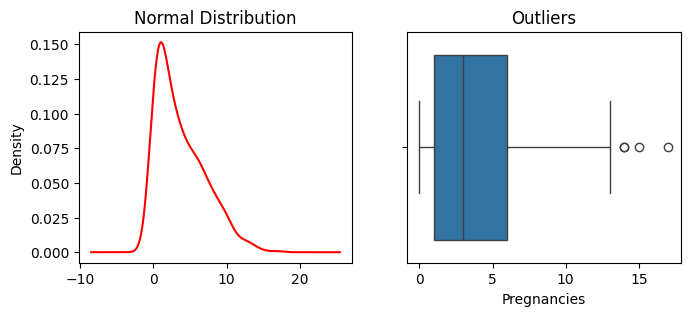

Glucose


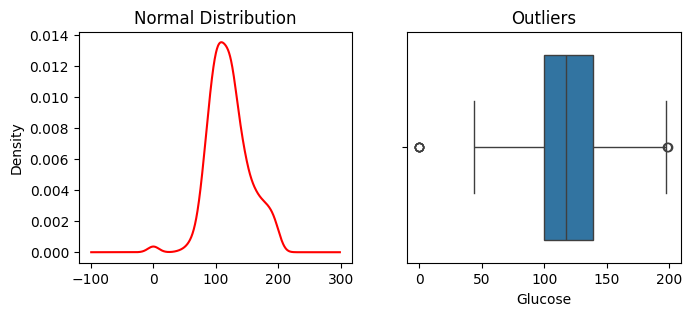

BloodPressure


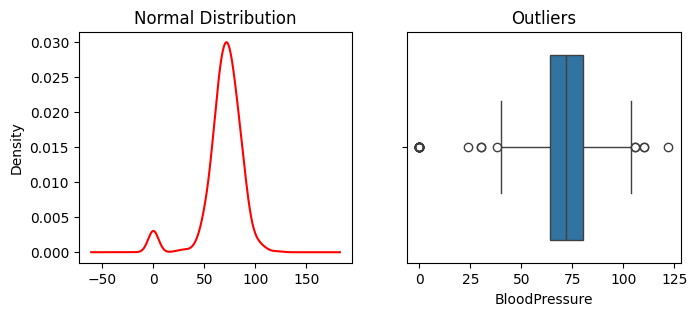

SkinThickness


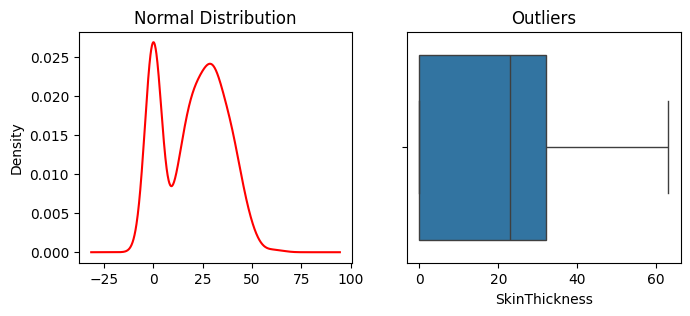

Insulin


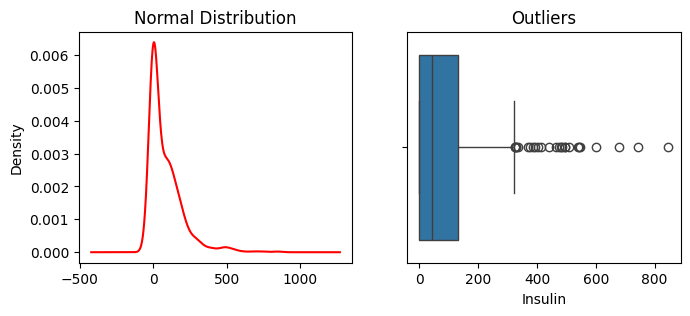

BMI


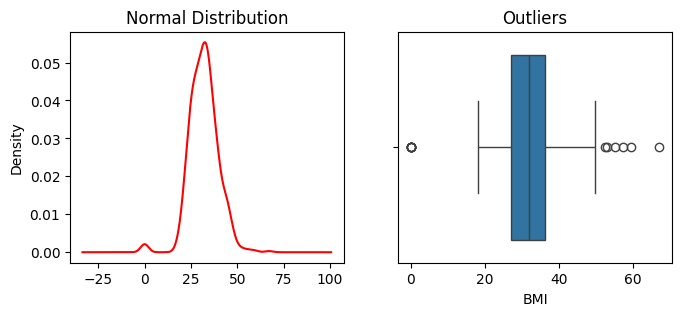

DiabetesPedigreeFunction


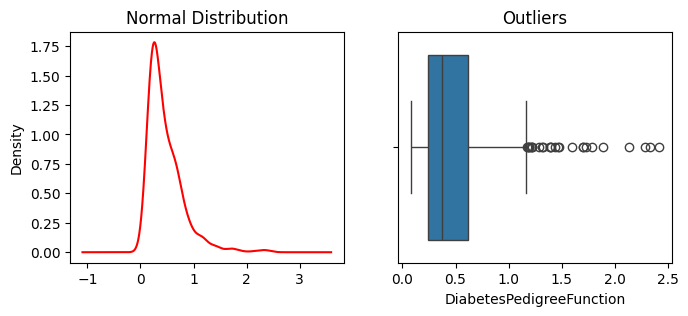

Age


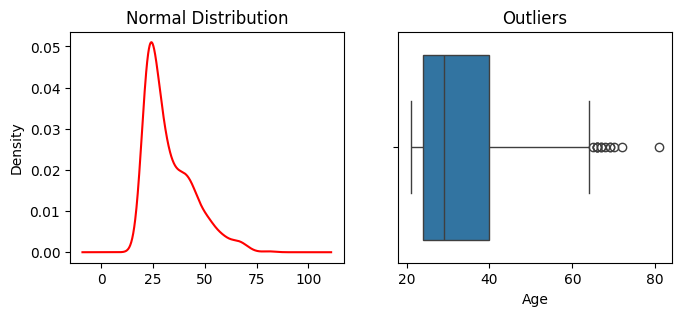

In [11]:
# to check each column outliers
def outlier_checking(X_train,var):
  print(var)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title('Normal Distribution')
  X_train[var].plot(kind='kde',color='r')
  plt.subplot(1,3,2)
  plt.title('Outliers')
  sns.boxplot(x = X_train[var])
  plt.show()

for i in X_train.columns:
  outlier_checking(X_train,i)

**To handle outliers**

trimming

capping

5th and 95th quantile





**5th and 95th quantile techniwue for above data**


In [12]:
def outlier_handling(X_train,var):
  upper_limit = X_train[var].quantile(0.95)
  lower_limit = X_train[var].quantile(0.05)

  return upper_limit,lower_limit


In [13]:
for i in X_train.columns:
  upper_limit,lower_limit = outlier_handling(X_train,i)
  X_train[i+'_5th'] = np.where(X_train[i] > upper_limit,upper_limit,
         np.where(X_train[i] < lower_limit,lower_limit,X_train[i]))

Pregnancies_5th


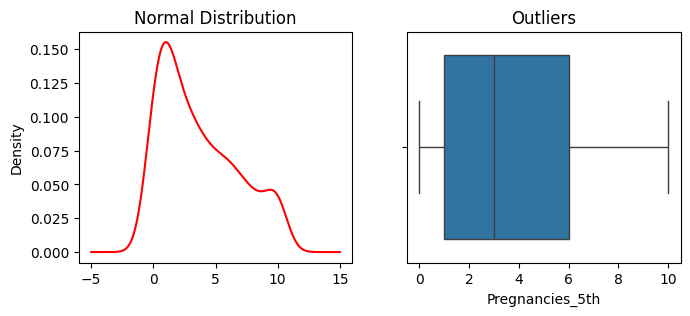

Glucose_5th


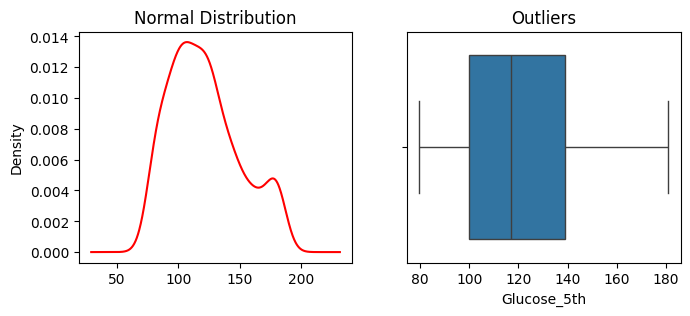

BloodPressure_5th


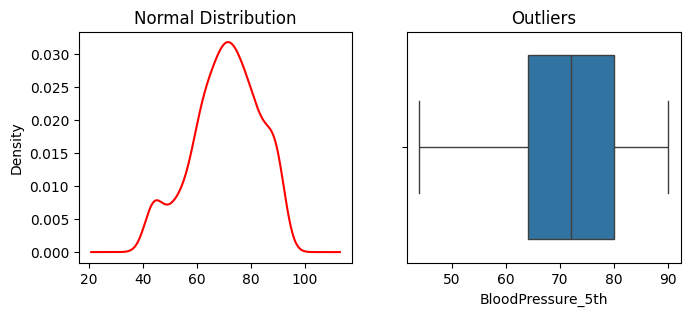

SkinThickness_5th


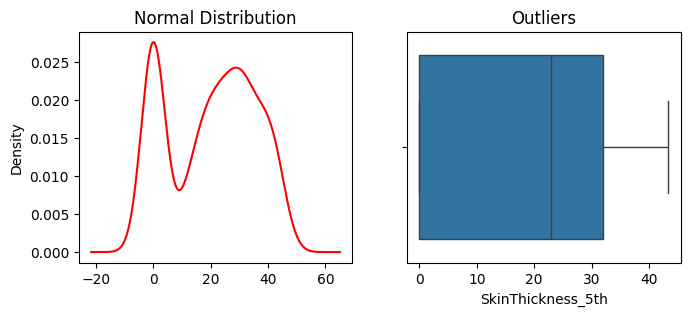

Insulin_5th


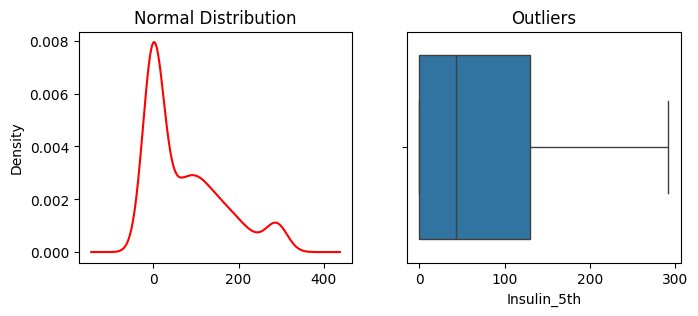

BMI_5th


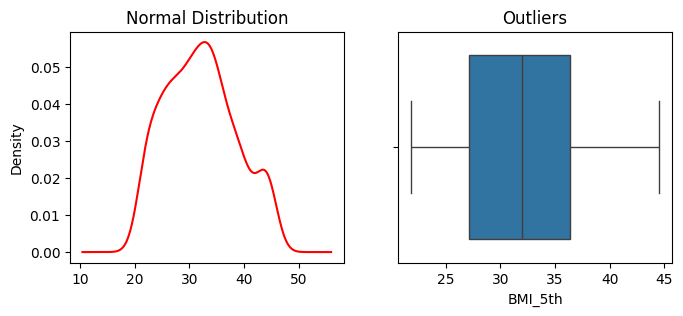

DiabetesPedigreeFunction_5th


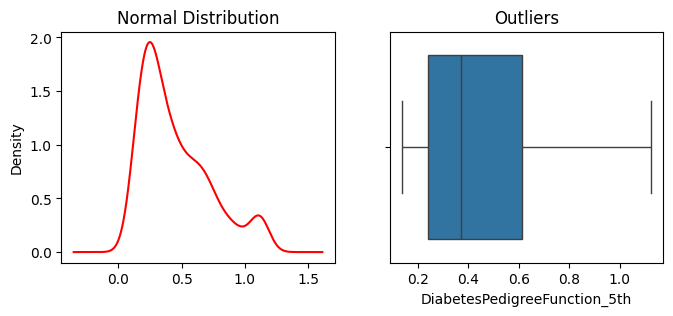

Age_5th


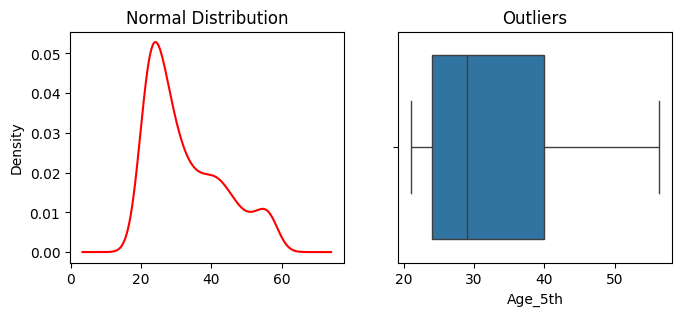

In [14]:
for i in X_train.columns:
  if '_5th' in i:
    outlier_checking(X_train,i)

In [15]:
#To remove original columns

X_train=X_train.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],axis=1)

In [16]:
#For test data

# X_test
def outlier_handling(X_test,var):
  upper_limit = X_test[var].quantile(0.95)
  lower_limit = X_test[var].quantile(0.05)

  return upper_limit,lower_limit


for i in X_test.columns:
  upper_limit,lower_limit = outlier_handling(X_test,i)
  X_test[i+'_5th'] = np.where(X_test[i] > upper_limit,upper_limit,
         np.where(X_test[i] < lower_limit,lower_limit,X_test[i]))

#To remove original columns
X_test=X_test.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],axis=1)


Pregnancies_5th


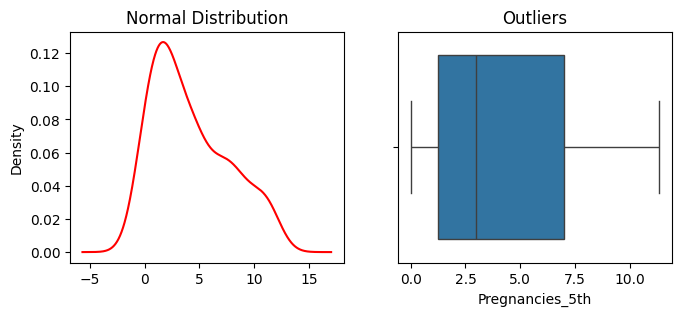

Glucose_5th


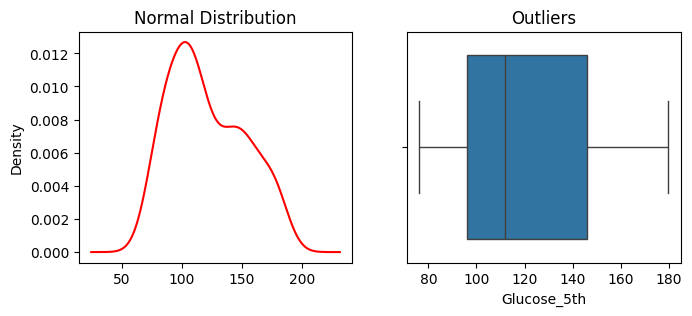

BloodPressure_5th


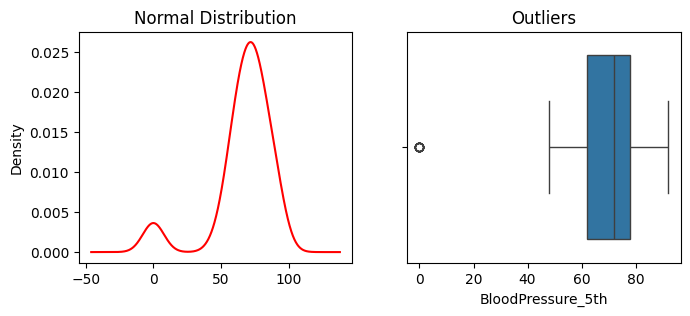

SkinThickness_5th


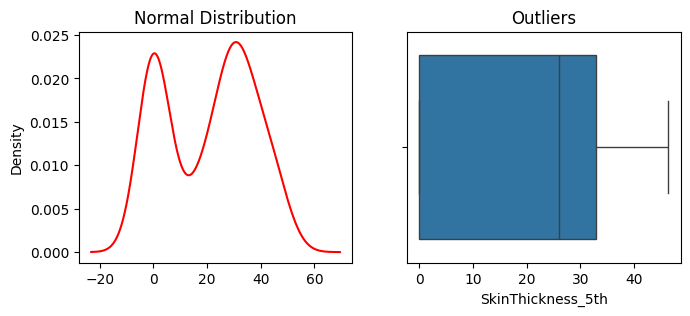

Insulin_5th


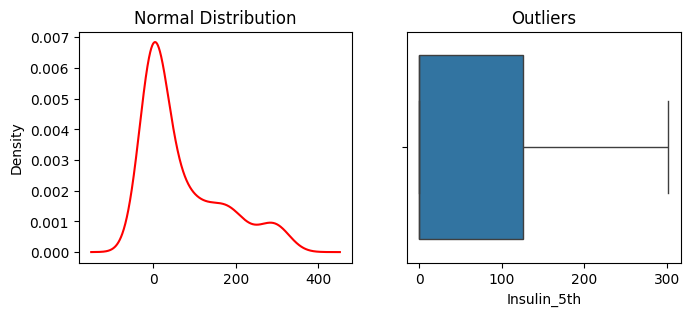

BMI_5th


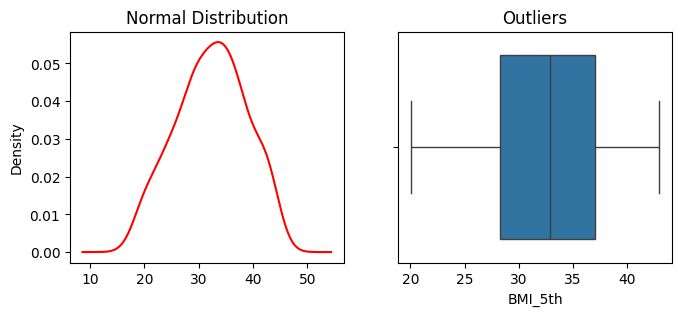

DiabetesPedigreeFunction_5th


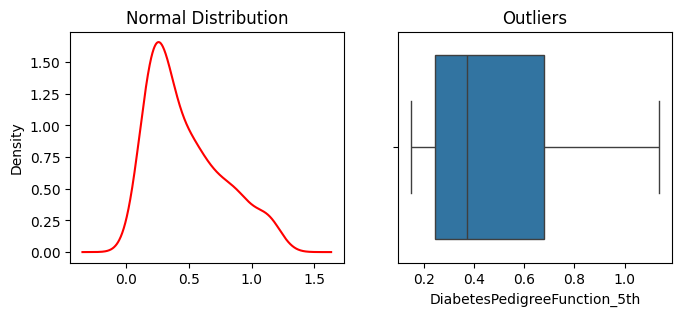

Age_5th


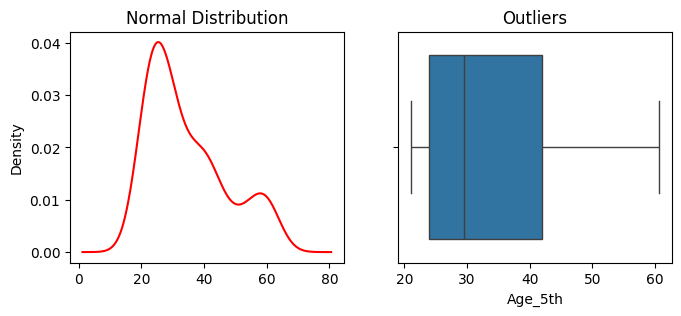

In [17]:
for i in X_test.columns:
  if '_5th' in i:
    outlier_checking(X_test,i)

**Data balancing**

In [54]:
# using upsampling technique we are going to balance the data

from imblearn.over_sampling import SMOTE

print(f'Count for Lables 1  : {sum(y_train == 1)}')
print(f'Count for Lables 0 : {sum(y_train == 0)}')

sm = SMOTE(random_state=42)

X_train_bal,y_train_bal = sm.fit_resample(X_train,y_train)


print(f'Count for Lables 1  : {sum(y_train_bal == 1)}')
print(f'Count for Lables 0  : {sum(y_train_bal== 0)}')

Count for Lables 1  : 213
Count for Lables 0 : 401
Count for Lables 1  : 401
Count for Lables 0  : 401


**Scaled down the data**

In [55]:
# standard_scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
res = sc.transform(X_train_bal)

#res -> to give scaled down outputs

scaled_X_train = pd.DataFrame(data=res)
scaled_X_train.columns = X_train.columns

scaled_X_train.head()

,Pregnancies_5th,Glucose_5th,BloodPressure_5th,SkinThickness_5th,Insulin_5th,BMI_5th,DiabetesPedigreeFunction_5th,Age_5th
0,-0.535695,-1.312209,-2.203472,-1.343164,-0.822386,-1.610541,-0.543723,-1.094773
1,1.734935,-0.330087,0.918615,0.254600,-0.822386,-0.608277,2.463927,1.653562
2,-0.860071,0.616960,-2.039152,-0.078267,0.105006,-0.529975,0.743641,-1.000003
3,-1.184447,1.388627,-1.710511,-1.343164,-0.822386,-1.594881,-0.727632,2.255353
4,0.761808,0.441581,0.754295,1.120056,2.436894,1.949846,-0.786483,1.274482


In [57]:
# to apply same thing on test data

res = sc.transform(X_test)

scaled_X_test = pd.DataFrame(data=res)
scaled_X_test.columns =X_test.columns

scaled_X_test.head()

,Pregnancies_5th,Glucose_5th,BloodPressure_5th,SkinThickness_5th,Insulin_5th,BMI_5th,DiabetesPedigreeFunction_5th,Age_5th
0,0.761808,-0.821148,-1.053230,0.853762,1.300560,0.300025,-0.080272,0.990171
1,-0.535695,-0.330087,0.343494,0.787188,-0.822386,0.566252,-1.115129,-1.094773
2,-0.535695,-0.470390,-0.560268,-1.343164,-0.822386,-0.201107,-1.080738,-1.094773
3,1.410559,-0.505465,0.754295,-1.343164,-0.822386,-1.172051,1.486634,0.137239
4,1.086183,0.511732,1.575897,-1.343164,-0.822386,-0.342051,-0.889472,1.653562


In [58]:
def knn_algo(x_train,y_train,x_test,y_test):
  knn_res = KNeighborsClassifier(n_neighbors=5) # default k_value is 5
  knn_res.fit(x_train,y_train)
  y_test_pred = knn_res.predict(x_test)
  print(f'Training Accuracy : {knn_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {knn_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [59]:
def naive_bayes_algo(x_train,y_train,x_test,y_test):
  nav_res = GaussianNB()
  nav_res.fit(x_train,y_train)
  y_test_pred = nav_res.predict(x_test)
  print(f'Training Accuracy : {nav_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {nav_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [60]:
def log_reg_algo(x_train,y_train,x_test,y_test):
  lg_res = LogisticRegression()
  lg_res.fit(x_train,y_train)
  y_test_pred = lg_res.predict(x_test)
  print(f'Training Accuracy : {lg_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {lg_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [61]:
def dt_algo(x_train,y_train,x_test,y_test):
  dt_res = DecisionTreeClassifier(criterion='entropy')
  dt_res.fit(x_train,y_train)
  y_test_pred = dt_res.predict(x_test)
  print(f'Training Accuracy : {dt_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {dt_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [62]:

def rf_algo(x_train,y_train,x_test,y_test):
  rf_res = RandomForestClassifier(criterion='entropy',n_estimators=11)
  rf_res.fit(x_train,y_train)
  y_test_pred = rf_res.predict(x_test)
  print(f'Training Accuracy : {rf_res.score(x_train,y_train)}')
  print(f'Test Accuracy : {rf_res.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [63]:
def common(x_train,y_train,x_test,y_test):
  print('-----knn-------')
  knn_algo(x_train,y_train,x_test,y_test)
  print('-----Naive Bayes------')
  naive_bayes_algo(x_train,y_train,x_test,y_test)
  print('-----Logistic Regression-------')
  log_reg_algo(x_train,y_train,x_test,y_test)
  print('-----Decision Tree-------')
  dt_algo(x_train,y_train,x_test,y_test)
  print('-----Random Forest-------')
  rf_algo(x_train,y_train,x_test,y_test)

In [64]:
final_X_train = scaled_X_train.copy()
final_y_train = y_train_bal.copy()
final_X_test = scaled_X_test.copy()
final_y_test = y_test.copy()

In [65]:
common(final_X_train,final_y_train,final_X_test,final_y_test)

-----knn-------
Training Accuracy : 0.85785536159601
Test Accuracy : 0.6688311688311688
Confusion Matrix Test data : [[65 34]
 [17 38]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.79      0.66      0.72        99
           1       0.53      0.69      0.60        55

    accuracy                           0.67       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.67      0.68       154

-----Naive Bayes------
Training Accuracy : 0.7356608478802993
Test Accuracy : 0.6818181818181818
Confusion Matrix Test data : [[68 31]
 [18 37]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.79      0.69      0.74        99
           1       0.54      0.67      0.60        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.68      0.69       15

**To select the best model**

**AUC and ROC -> for selecting the best Model**

AUC -> AREA UNDER THE CURVE

ROC -> RECTIFIER OPERATING CHARACTERSTICS

In [66]:
# knn
knn_reg = KNeighborsClassifier()
knn_reg.fit(final_X_train,final_y_train)
knn_pred = knn_reg.predict(final_X_test)


# naive bayes
naive_reg = GaussianNB()
naive_reg.fit(final_X_train,final_y_train)
naive_pred = naive_reg.predict(final_X_test)

# logistic regression
log_reg = LogisticRegression()
log_reg.fit(final_X_train,final_y_train)
log_pred = log_reg.predict(final_X_test)


# decision_tree
dt_reg = DecisionTreeClassifier(criterion='entropy')
dt_reg.fit(final_X_train,final_y_train)
dt_pred = dt_reg.predict(final_X_test)


# random_forest
rf_reg = RandomForestClassifier(criterion='entropy',n_estimators=11)
rf_reg.fit(final_X_train,final_y_train)
rf_pred = rf_reg.predict(final_X_test)


In [67]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr_knn,tpr_knn,threshold = roc_curve(final_y_test,knn_pred)
fpr_lr,tpr_lr,threshold = roc_curve(final_y_test,log_pred)
fpr_nb,tpr_nb,threshold = roc_curve(final_y_test,naive_pred)
fpr_dt,tpr_dt,threshold = roc_curve(final_y_test,dt_pred)
fpr_rf,tpr_rf,threshold = roc_curve(final_y_test,rf_pred)

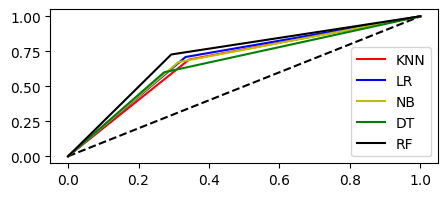

In [68]:
# To plot the data

plt.figure(figsize=(5,2))
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_knn,tpr_knn,color='r',label='KNN')
plt.plot(fpr_lr,tpr_lr,color='b',label='LR')
plt.plot(fpr_nb,tpr_nb,color='y',label='NB')
plt.plot(fpr_dt,tpr_dt,color='g',label='DT')
plt.plot(fpr_rf,tpr_rf,color='black',label='RF')

plt.legend(loc=0)
plt.show()

**From the Above operations I am going to finalize the Naive Bayes Model for the Project**



- From the Finalized Model -> we can do some improvemens -> selecting the Best Parameters -> if we select the Best Parameters there is a chance in changing the Metics



In [69]:
#naive bayes algorithm has high precision value

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing values
}

# Initialize the GridSearchCV object
grid_model = GridSearchCV(GaussianNB(), parameters, cv=10)

# Fit the model
grid = grid_model.fit(final_X_train, final_y_train)

# Get the best parameters
print("Best parameters for Naive Bayes:", grid.best_params_)


Best parameters for Naive Bayes: {'var_smoothing': 1e-09}


In [70]:
#  Apply Best parameters

final_model =GaussianNB(var_smoothing = 1e-09)
final_model.fit(final_X_train, final_y_train)



print(f'Final Test Accuracy : {final_model.score(final_X_test,final_y_test)}')

Final Test Accuracy : 0.6818181818181818


In [71]:
# Save the model

import pickle
with open ('diabetes.pkl','wb') as f:
  pickle.dump(final_model,f)

In [72]:
#Save the scaling

import pickle
with open('scaled_data_diabetes.pkl','wb') as f:
   pickle.dump(sc,f)

**ANN ARCHITECTURE**

In [74]:
!nvidia-smi

Wed Jan 29 05:13:49 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              29W /  70W |    257MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [75]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import relu,sigmoid,softmax

In [76]:
# define the architecture

model = Sequential()

# input to 1st Hidden layer
model.add(Dense(units=128,kernel_initializer='he_uniform',activation=relu,input_dim=final_X_train.shape[1]))


# outcome from 1st H.Layer will be given to 2nd H.Layer
model.add(Dense(units=64,kernel_initializer='he_uniform',activation=relu))


# outcome from 2nd H.Layer will be given to 3rd H.Layer
model.add(Dense(units=32,kernel_initializer='he_uniform',activation=relu))

# outcome from 3rd H.Layer will be given to 4th H.Layer
model.add(Dense(units=16,kernel_initializer='he_uniform',activation=relu))


# outcome from 4th H.Layer will be given to 5th H.Layer
model.add(Dense(units=8,kernel_initializer='he_uniform',activation=relu))


# outcome from 5th H.Layer will be given to output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation=sigmoid))

In [77]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])


In [79]:
# Train the Model
model.fit(final_X_train,final_y_train,batch_size=20,validation_split=0.2,epochs=50)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - acc: 0.6885 - loss: 0.5940 - val_acc: 0.6646 - val_loss: 0.5892
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7881 - loss: 0.4336 - val_acc: 0.7081 - val_loss: 0.5648
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8010 - loss: 0.3899 - val_acc: 0.7516 - val_loss: 0.4845
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8017 - loss: 0.4023 - val_acc: 0.7640 - val_loss: 0.5175
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8193 - loss: 0.3666 - val_acc: 0.8137 - val_loss: 0.4538
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8317 - loss: 0.3585 - val_acc: 0.7950 - val_loss: 0.4762
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8500 - loss: 0.3248 - val_acc: 0.8385 - val_loss: 0.4042
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8663 - loss: 0.3163 - val_acc: 0.8385 - val_loss: 0.3810
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8880 - loss:

In [80]:
outcome = model.predict(X_test)
d = []

for i in outcome:
  if i[0] > 0.5:
    d.append(1)
  else:
    d.append(0)
d

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [82]:
print(accuracy_score(final_y_test,d))

0.33766233766233766


In [83]:
confusion_matrix(final_y_test,d)

array([[ 5, 94],
       [ 8, 47]])

In [84]:
print(classification_report(final_y_test,d))

              precision    recall  f1-score   support

           0       0.38      0.05      0.09        99
           1       0.33      0.85      0.48        55

    accuracy                           0.34       154
   macro avg       0.36      0.45      0.28       154
weighted avg       0.37      0.34      0.23       154

